In [52]:
import pandas as pd 
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import datetime 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.metrics import mean_squared_error
import seaborn as sns
import math

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Read data

In [53]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [54]:
train_df.head(2)

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,family_or_single,furnished,num_living_rooms,maid_room,price_per_meter,advertiser_type,pool,paid,price,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,2016-03-04 13:49:48,2016-06-02 07:07:34,0,1,4,0,1,مغلق,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,2,لا يوجد غرفة خادمة,0,مسوق,لا يوجد مسبح,مجاني,1250000,غير محدد,0,297,شمال,15,للبيع,5,24.8402,46.7528,Riyadh,AR RIYADH,Al Munsiyah
1,2016-02-21 23:35:44,2016-02-25 12:19:14,0,0,0,0,0,مغلق,سكني,أرض,لا يوجد غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,0,لا يوجد غرفة خادمة,1000,مالك,لا يوجد مسبح,مجاني,450000,غير محدد,0,450,شمال,20,للبيع,0,24.6175,46.5280,Riyadh,UBAYR,Dhahrat Laban


In [55]:
train_df.dtypes

creation_datetime             object
updated_at                    object
age_less_than                  int64
num_apartments                 int64
num_bedrooms                   int64
floor_num                      int64
num_kitchens                   int64
closed                        object
commercial_or_residential     object
property_type                 object
driver_room                   object
duplex                        object
family_or_single              object
furnished                     object
num_living_rooms               int64
maid_room                     object
price_per_meter                int64
advertiser_type               object
pool                          object
paid                          object
price                          int64
rent_period                   object
num_rooms                      int64
area                           int64
street_direction              object
street_width                   int64
for_rent_or_sale              object
n

In [56]:
train_df.corr()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,Latitude,Longitude
age_less_than,1.000000,0.013865,0.184964,0.036077,0.108891,0.128083,-0.005921,0.005764,0.005542,-0.002712,-0.038574,0.153359,-0.156739,0.130230
num_apartments,0.013865,1.000000,-0.160026,-0.126690,-0.101161,-0.102238,-0.003923,0.006104,0.231892,-0.001514,0.205932,-0.136790,-0.019370,0.039736
num_bedrooms,0.184964,-0.160026,1.000000,0.127441,0.585753,0.722277,-0.015708,-0.003884,-0.073835,-0.014039,-0.277919,0.906549,-0.044315,0.015507
floor_num,0.036077,-0.126690,0.127441,1.000000,0.086584,-0.009651,-0.006622,-0.000614,-0.027808,-0.001857,-0.367403,-0.002504,-0.009361,0.080772
num_kitchens,0.108891,-0.101161,0.585753,0.086584,1.000000,0.561773,-0.013154,-0.006727,-0.052626,-0.010069,-0.184920,0.603746,-0.016608,-0.011744
num_living_rooms,0.128083,-0.102238,0.722277,-0.009651,0.561773,1.000000,-0.012098,-0.005208,-0.053653,-0.006894,-0.130059,0.794045,-0.007291,-0.035212
price_per_meter,-0.005921,-0.003923,-0.015708,-0.006622,-0.013154,-0.012098,1.000000,0.000227,-0.000864,0.003228,0.012787,-0.014843,0.004428,0.006943
price,0.005764,0.006104,-0.003884,-0.000614,-0.006727,-0.005208,0.000227,1.000000,0.005681,0.196517,0.001628,-0.004383,0.001321,0.008776
num_rooms,0.005542,0.231892,-0.073835,-0.027808,-0.052626,-0.053653,-0.000864,0.005681,1.000000,0.002764,0.057826,-0.065837,-0.007665,0.004713
area,-0.002712,-0.001514,-0.014039,-0.001857,-0.010069,-0.006894,0.003228,0.196517,0.002764,1.000000,0.015343,-0.013159,-0.002179,0.008485


In [57]:
train_df.price_per_meter.value_counts()

0             61860
2000            615
1000            496
2500            469
1500            456
3000            411
2200            390
1400            310
4000            293
2300            284
1600            280
1300            276
1800            275
1200            273
2100            259
1700            257
2600            248
2400            244
3500            234
2800            229
2700            195
800             180
200             176
1900            172
500             171
1100            170
1350            165
1250            165
5000            161
1750            161
700             154
1               146
300             141
900             141
750             137
4500            132
1450            131
600             130
100             121
1650            118
3200            117
2250            110
400             104
1550            100
1150            100
250              96
3300             93
2900             92
850              90
6000             90


In [58]:
test_df.head(2)

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,family_or_single,furnished,num_living_rooms,maid_room,price_per_meter,advertiser_type,pool,paid,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,2016-04-12 03:15:06,2016-08-27 21:41:14,5,1,5,0,1,متاح,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,5,غرفة خادمة,0,مسوق,مسبح,مجاني,غير محدد,0,400,شمال,10,للبيع,5,24.6890,46.6937,Riyadh,AR RIYADH,Al Ulaya
1,2015-11-18 17:52:29,2016-06-04 04:00:13,15,0,5,0,2,مغلق,غير محدد,فيلا,لا يوجد غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,2,غرفة خادمة,0,مسوق,لا يوجد مسبح,مجاني,غير محدد,0,625,جنوب غربي,15,للبيع,5,24.4921,46.6185,Riyadh,LABAN,Dirab


### Explore data

In [59]:
train_df.shape

(79975, 33)

In [60]:
test_df.shape

(19994, 32)

In [61]:
train_df.isna().sum()

creation_datetime               0
updated_at                      0
age_less_than                   0
num_apartments                  0
num_bedrooms                    0
floor_num                       0
num_kitchens                    0
closed                          0
commercial_or_residential       0
property_type                   0
driver_room                     0
duplex                          0
family_or_single                0
furnished                       0
num_living_rooms                0
maid_room                       0
price_per_meter                 0
advertiser_type                 0
pool                            0
paid                            0
price                           0
rent_period                     0
num_rooms                       0
area                            0
street_direction                0
street_width                    0
for_rent_or_sale                0
num_water_cycles                0
Latitude                        0
Longitude     

In [62]:
test_df.isna().sum()

creation_datetime              0
updated_at                     0
age_less_than                  0
num_apartments                 0
num_bedrooms                   0
floor_num                      0
num_kitchens                   0
closed                         0
commercial_or_residential      0
property_type                  0
driver_room                    0
duplex                         0
family_or_single               0
furnished                      0
num_living_rooms               0
maid_room                      0
price_per_meter                0
advertiser_type                0
pool                           0
paid                           0
rent_period                    0
num_rooms                      0
area                           0
street_direction               0
street_width                   0
for_rent_or_sale               0
num_water_cycles               0
Latitude                       0
Longitude                      0
region_name_en                 0
nearest_ci

In [63]:
train_df.shape

(79975, 33)

<Figure size 720x720 with 0 Axes>

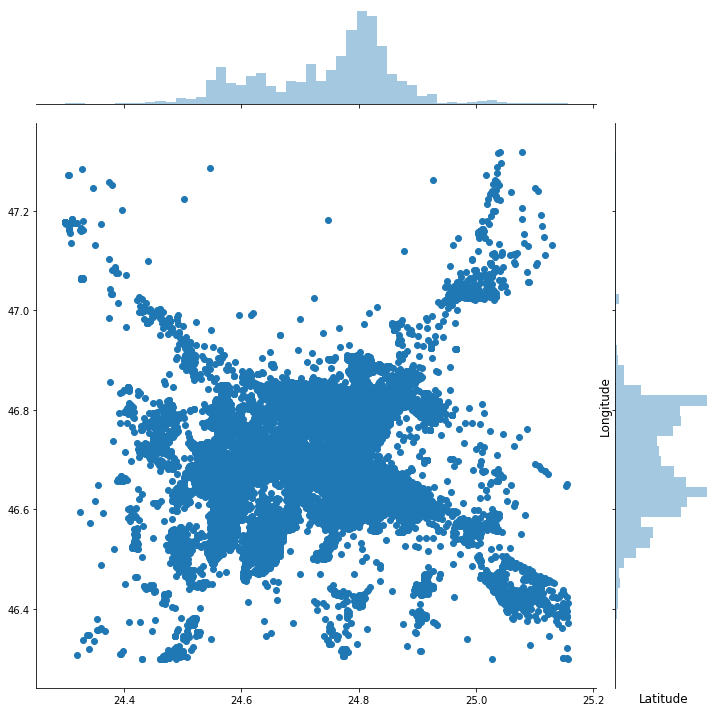

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.jointplot(x=train_df.Latitude.values, y=train_df.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine
# plt.xticks(range(len(train_df['creation_datetime'])), train_df['creation_datetime'])

Text(0.5, 1.0, 'Price vs Square Feet')

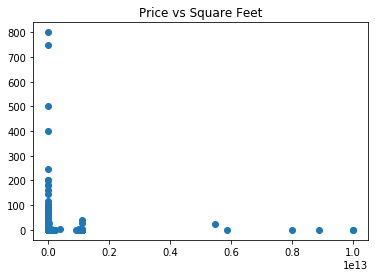

In [72]:
plt.scatter(train_df.price,train_df.num_rooms)
plt.title("Price vs Square Feet")

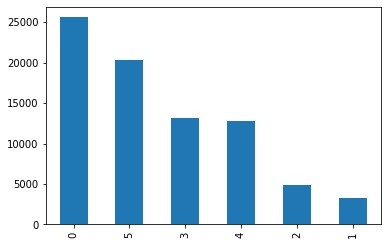

In [77]:
train_df.num_bedrooms.value_counts().plot(kind='bar')

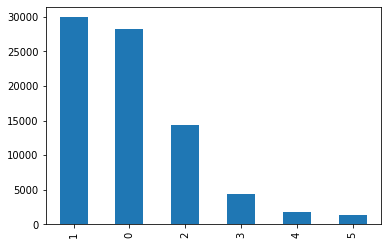

In [78]:
train_df.num_living_rooms.value_counts().plot(kind='bar')

### Preprocessing

#### 1- Drop unneeded features

In [79]:
#NOTE: age_less_than is dropped as it is not 100% accurate
train_df = train_df.drop([ 'updated_at', 'age_less_than', 'region_name_en', 'nearest_city_name_en', 'district_name_en', 'Latitude', 'Longitude'], axis=1)
test_df = test_df.drop([ 'updated_at', 'age_less_than', 'region_name_en', 'nearest_city_name_en', 'district_name_en', 'Latitude', 'Longitude'], axis=1)


In [80]:
train_df.head(1)

,creation_datetime,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,family_or_single,furnished,num_living_rooms,maid_room,price_per_meter,advertiser_type,pool,paid,price,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles
0,2016-03-04 13:49:48,1,4,0,1,مغلق,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,2,لا يوجد غرفة خادمة,0,مسوق,لا يوجد مسبح,مجاني,1250000,غير محدد,0,297,شمال,15,للبيع,5


#### 2- Extract needed features

In [81]:

#### Calculate age of property in years: ####

now = datetime.datetime.today()
def cal_property_age(creation_date):
    global now
    parsed_date = datetime.datetime.strptime(creation_date, '%Y-%m-%d %H:%M:%S')
    return relativedelta(now, parsed_date.date()).years


train_df['property_age'] = train_df.apply(lambda x: cal_property_age(x['creation_datetime']), axis = 1)
test_df['property_age'] = test_df.apply(lambda x: cal_property_age(x['creation_datetime']), axis = 1)



In [82]:
# Drop creation_datetime .. it is not needed anymore
train_df = train_df.drop([ 'creation_datetime'], axis=1)
test_df = test_df.drop(['creation_datetime'], axis=1)

In [83]:
train_df.dtypes

num_apartments                int64
num_bedrooms                  int64
floor_num                     int64
num_kitchens                  int64
closed                       object
commercial_or_residential    object
property_type                object
driver_room                  object
duplex                       object
family_or_single             object
furnished                    object
num_living_rooms              int64
maid_room                    object
price_per_meter               int64
advertiser_type              object
pool                         object
paid                         object
price                         int64
rent_period                  object
num_rooms                     int64
area                          int64
street_direction             object
street_width                  int64
for_rent_or_sale             object
num_water_cycles              int64
property_age                  int64
dtype: object

#### Separate categoral features from numerical features

In [84]:
train_df_numerical_features = pd.concat([train_df.iloc[:,0:4], train_df.iloc[:, 11], train_df.iloc[:, 13], train_df.iloc[:, 17], train_df.iloc[:, 19:21], train_df.iloc[:, 22], train_df.iloc[:, 24:]], axis=1)  
test_df_numerical_features = pd.concat([test_df.iloc[:,0:4], test_df.iloc[:, 11], test_df.iloc[:, 13], test_df.iloc[:, 18:20], test_df.iloc[:, 21], test_df.iloc[:, 23:]], axis=1) 

train_df_categorical_features = pd.concat([train_df.iloc[:, 4:11], train_df.iloc[:, 12], train_df.iloc[:, 14:17],train_df.iloc[:, 18], train_df.iloc[:, 21], train_df.iloc[:, 23]] , axis=1)
test_df_categorical_features = pd.concat([test_df.iloc[:, 4:11], test_df.iloc[:, 12], test_df.iloc[:, 14:18], test_df.iloc[:, 20], test_df.iloc[:, 22]] , axis=1)


In [85]:

#### Encode categorical features: ####
def encode_categorical(df):
    label_encoder = LabelEncoder()
    df = df.apply(label_encoder.fit_transform)
    return df
# X_categorical_features = pd.concat([train_df_categorical_features, test_df_categorical_features]) # Should be done if test data are labeled
X_categorical_features = encode_categorical(train_df_categorical_features)



In [86]:

def onehot_encode_labels(X):
    closed_id_ohe = OneHotEncoder()
    closed_ids = closed_id_ohe.fit_transform(X.closed.values.reshape(-1,1)).toarray()
    
    commercial_or_residential_id_ohe = OneHotEncoder()
    commercial_or_residential_ids = commercial_or_residential_id_ohe.fit_transform(X.commercial_or_residential.values.reshape(-1,1)).toarray()
    
    property_type_id_ohe = OneHotEncoder()
    property_type_ids = property_type_id_ohe.fit_transform(X.property_type.values.reshape(-1,1)).toarray()
    
    family_or_single_id_ohe = OneHotEncoder()
    family_or_single_ids = family_or_single_id_ohe.fit_transform(X.family_or_single.values.reshape(-1,1)).toarray()
    
    rent_period_id_ohe = OneHotEncoder()
    rent_period_ids = rent_period_id_ohe.fit_transform(X.rent_period.values.reshape(-1,1)).toarray()
    
    street_direction_id_ohe = OneHotEncoder()
    street_direction_ids = street_direction_id_ohe.fit_transform(X.street_direction.values.reshape(-1,1)).toarray()
    
    
    return closed_ids, commercial_or_residential_ids, property_type_ids, family_or_single_ids, rent_period_ids, street_direction_ids

closed_ids, commercial_or_residential_ids, property_type_ids, family_or_single_ids,rent_period_ids, street_direction_ids = onehot_encode_labels(X_categorical_features)





/Users/deema/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/deema/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

In [87]:
closed_ids = pd.DataFrame(closed_ids, columns = ["closed"+str(int(i)) for i in range(closed_ids.shape[1])])
commercial_or_residential_ids = pd.DataFrame(commercial_or_residential_ids, columns = ["commercial_or_residential"+str(int(i)) for i in range(commercial_or_residential_ids.shape[1])])
property_type_ids = pd.DataFrame(property_type_ids, columns = ["property_type"+str(int(i)) for i in range(property_type_ids.shape[1])])
family_or_single_ids = pd.DataFrame(family_or_single_ids, columns = ["family_or_single"+str(int(i)) for i in range(family_or_single_ids.shape[1])])
rent_period_ids = pd.DataFrame(rent_period_ids, columns = ["rent_period"+str(int(i)) for i in range(rent_period_ids.shape[1])])
street_direction_ids = pd.DataFrame(street_direction_ids, columns = ["street_direction"+str(int(i)) for i in range(street_direction_ids.shape[1])])


ohe_categories = pd.concat([closed_ids, commercial_or_residential_ids, property_type_ids, family_or_single_ids,rent_period_ids, street_direction_ids ], axis = 1)
ohe_categories.reset_index(drop=True, inplace=True)



In [88]:
X_categorical_features = X_categorical_features.drop(['closed', 'commercial_or_residential', 'property_type', 'family_or_single', 'rent_period', 'street_direction'], axis=1)

In [89]:
X_categorical_features.head()

,driver_room,duplex,furnished,maid_room,advertiser_type,pool,paid,for_rent_or_sale
0,0,1,0,1,1,0,0,1
1,1,1,0,1,0,0,0,1
2,0,1,0,0,1,1,0,1
3,1,1,0,1,1,0,0,1
4,1,1,0,1,1,0,0,0


In [90]:
X_categorical_features.reset_index(drop=True, inplace=True)

In [91]:
ohe_categories.shape

(79975, 46)

In [92]:
categorical_features = pd.concat([X_categorical_features, ohe_categories], axis = 1)

In [93]:
categorical_features.head()

,driver_room,duplex,furnished,maid_room,advertiser_type,pool,paid,for_rent_or_sale,closed0,closed1,closed2,commercial_or_residential0,commercial_or_residential1,commercial_or_residential2,commercial_or_residential3,commercial_or_residential4,commercial_or_residential5,commercial_or_residential6,commercial_or_residential7,property_type0,property_type1,property_type2,property_type3,property_type4,property_type5,property_type6,property_type7,property_type8,property_type9,property_type10,property_type11,property_type12,property_type13,family_or_single0,family_or_single1,family_or_single2,rent_period0,rent_period1,rent_period2,rent_period3,rent_period4,rent_period5,rent_period6,street_direction0,street_direction1,street_direction2,street_direction3,street_direction4,street_direction5,street_direction6,street_direction7,street_direction8,street_direction9,street_direction10
0,0,1,0,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0,1,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1,0,0,1,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,0,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [94]:
train_df_numerical_features.reset_index(drop=True, inplace=True)

In [95]:
X = pd.concat([categorical_features, train_df_numerical_features], axis = 1)
# y = train_df_numerical_features.iloc[:, 6]


In [96]:
X.shape

(79975, 66)

In [97]:
# df = pd.concat([X, y], axis = 1)

In [98]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

X_train, X_test = train_test_split(X, train_size = 0.7, test_size = 0.3, random_state = 100)


In [99]:
X_train.head(1)

,driver_room,duplex,furnished,maid_room,advertiser_type,pool,paid,for_rent_or_sale,closed0,closed1,closed2,commercial_or_residential0,commercial_or_residential1,commercial_or_residential2,commercial_or_residential3,commercial_or_residential4,commercial_or_residential5,commercial_or_residential6,commercial_or_residential7,property_type0,property_type1,property_type2,property_type3,property_type4,property_type5,property_type6,property_type7,property_type8,property_type9,property_type10,property_type11,property_type12,property_type13,family_or_single0,family_or_single1,family_or_single2,rent_period0,rent_period1,rent_period2,rent_period3,rent_period4,rent_period5,rent_period6,street_direction0,street_direction1,street_direction2,street_direction3,street_direction4,street_direction5,street_direction6,street_direction7,street_direction8,street_direction9,street_direction10,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,property_age
50182,1,1,0,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,5,0,1,1,0,1350000,0,375,20,3,4


In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['price_per_meter', 'price', 'area', 'street_width']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_test[num_vars] = scaler.fit_transform(X_test[num_vars])


/Users/deema/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/deema/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/deema/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [101]:
X_train.head(2)

,driver_room,duplex,furnished,maid_room,advertiser_type,pool,paid,for_rent_or_sale,closed0,closed1,closed2,commercial_or_residential0,commercial_or_residential1,commercial_or_residential2,commercial_or_residential3,commercial_or_residential4,commercial_or_residential5,commercial_or_residential6,commercial_or_residential7,property_type0,property_type1,property_type2,property_type3,property_type4,property_type5,property_type6,property_type7,property_type8,property_type9,property_type10,property_type11,property_type12,property_type13,family_or_single0,family_or_single1,family_or_single2,rent_period0,rent_period1,rent_period2,rent_period3,rent_period4,rent_period5,rent_period6,street_direction0,street_direction1,street_direction2,street_direction3,street_direction4,street_direction5,street_direction6,street_direction7,street_direction8,street_direction9,street_direction10,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,property_age
50182,1,1,0,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,5,0,1,1,0.0,1.518750e-07,0,1.746230e-07,0.2,3,4
37492,1,1,0,1,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1.0,2.415915e-04,0,2.393499e-04,0.6,0,5


In [102]:
X_train = X_train
y_train = X_train.pop('price')

X_test = X_test
y_test = X_test.pop('price')

In [103]:
y_test.shape

(23993,)

In [104]:
# def scale_features(X_train, X_test):
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
   
#     scaler = StandardScaler()
#     scaler.fit(X_test)
#     X_test = scaler.transform(X_test)
#     return X_train, X_test

# X_train, X_test = scale_features(X_train, X_test)


In [105]:
reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y_pred = reg.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))


86346.10554444458


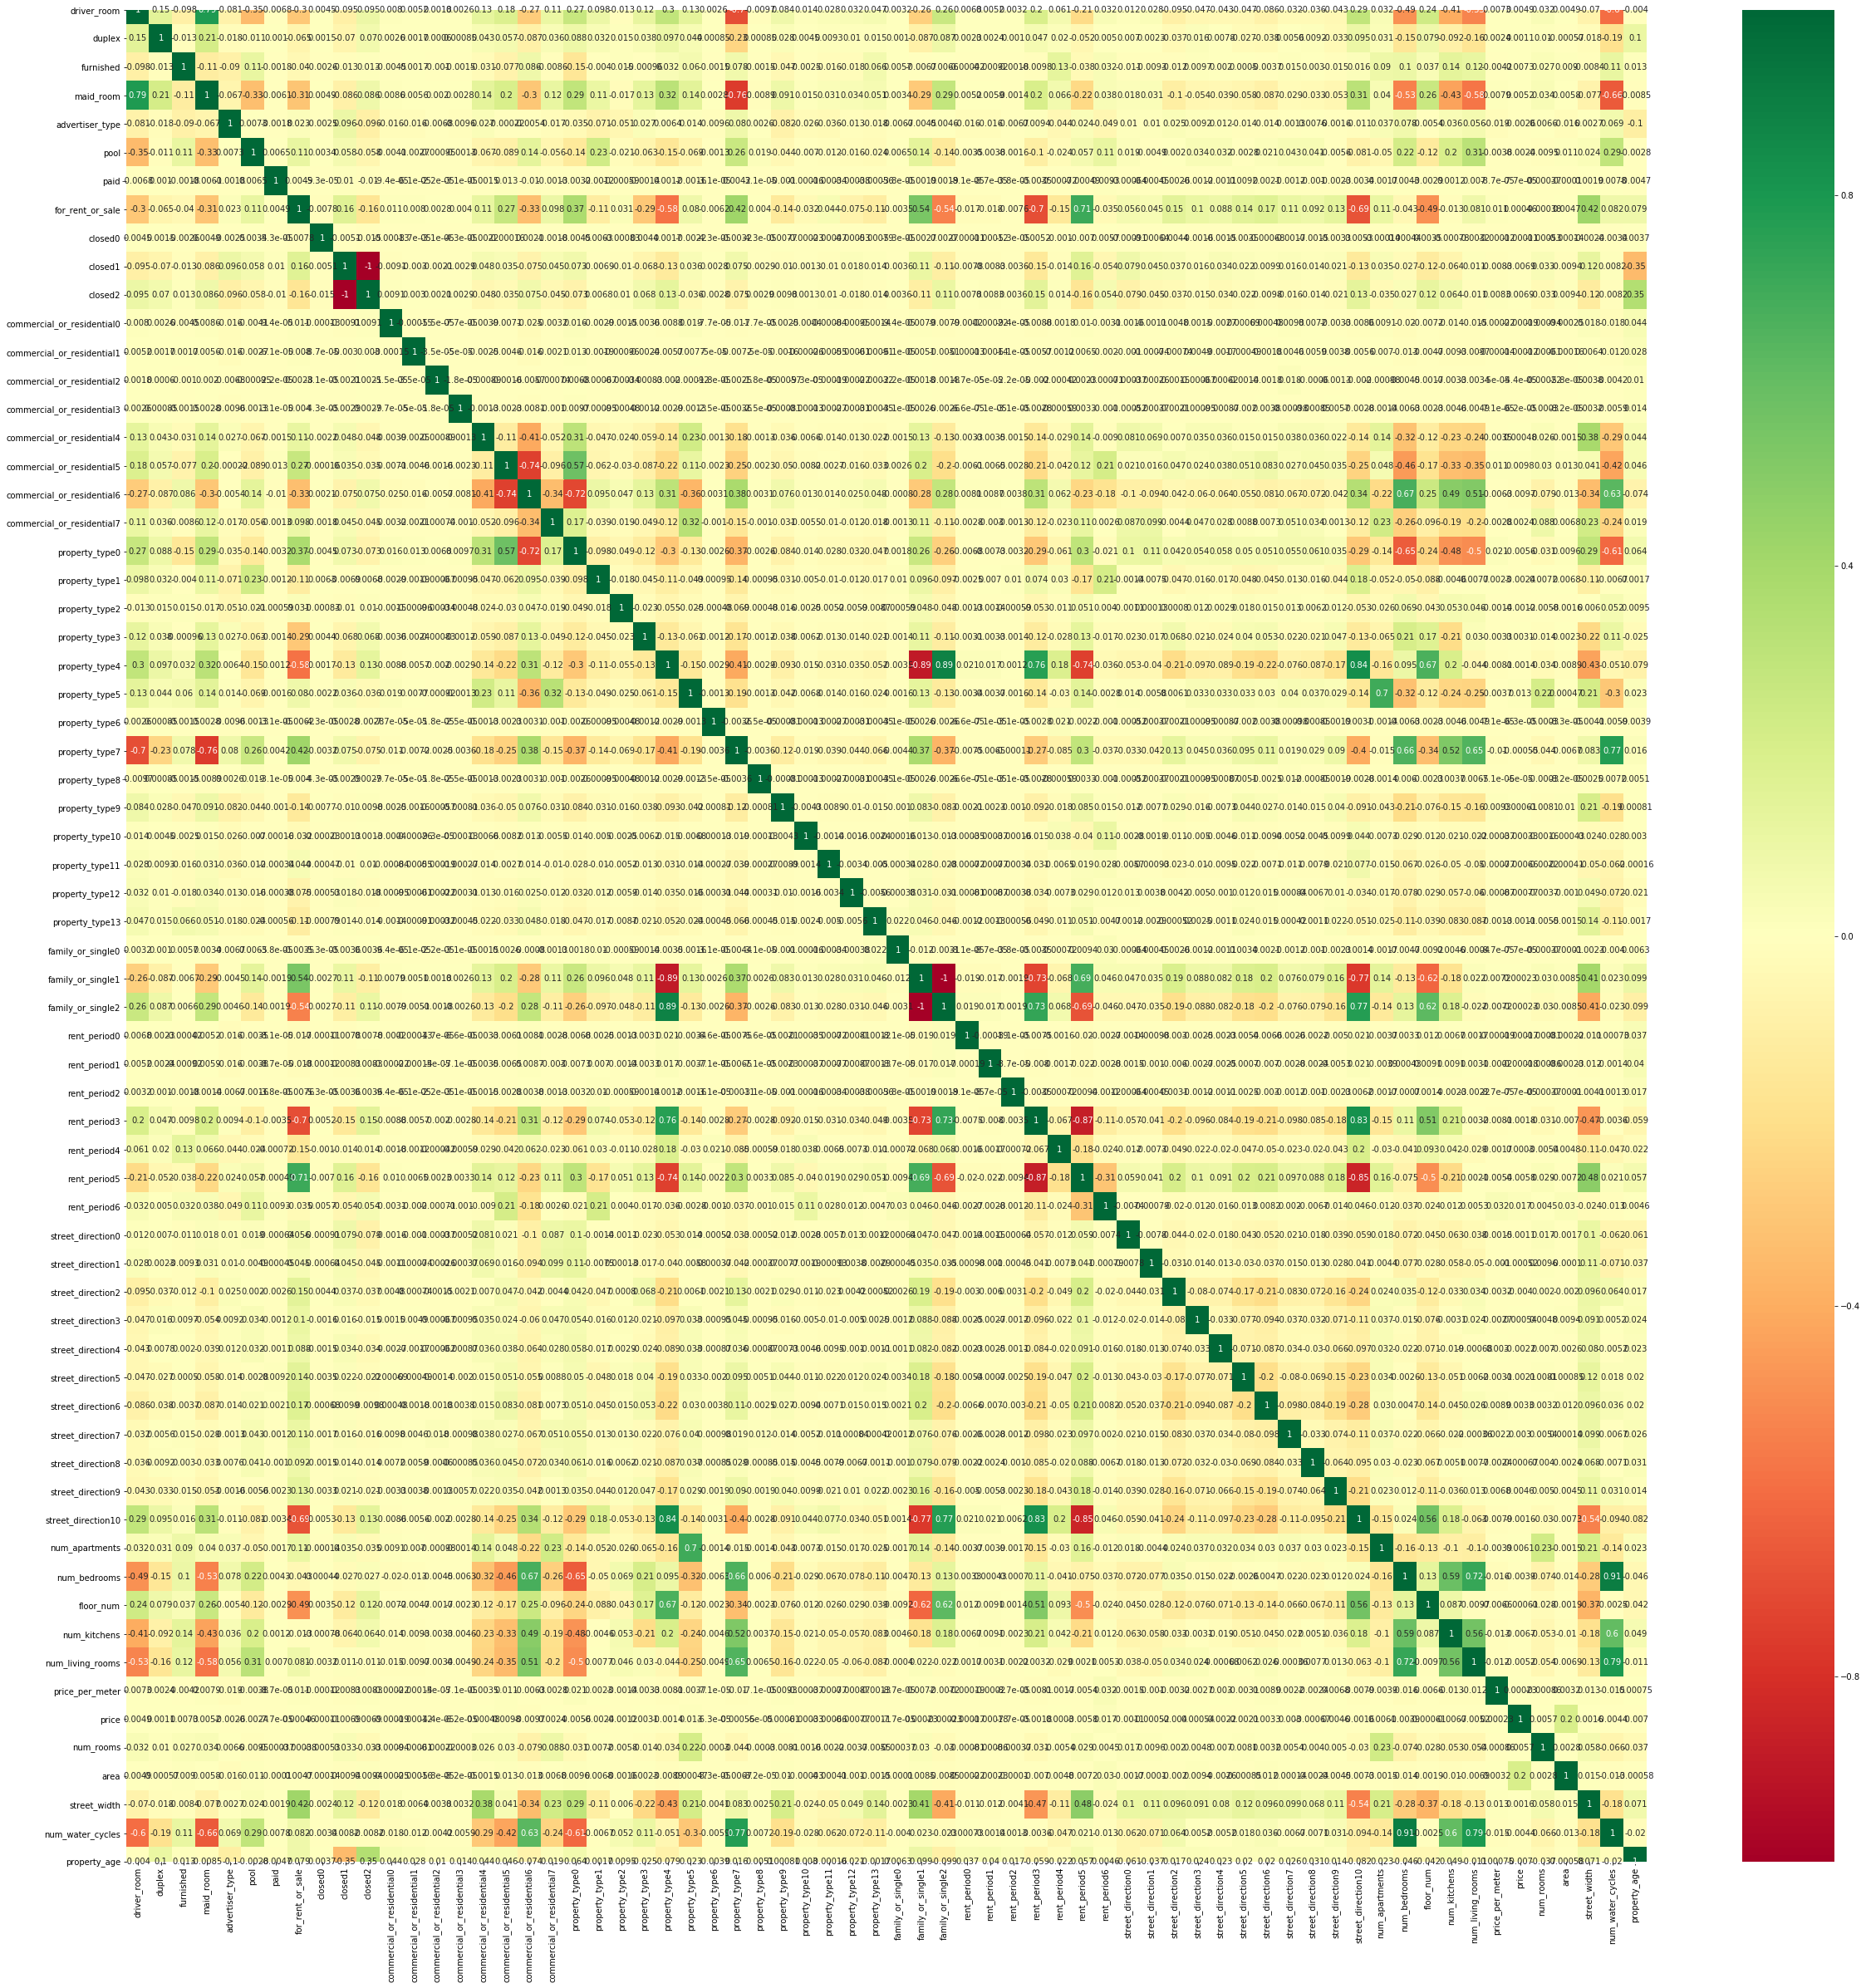

In [108]:
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(41,41))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")